In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd

from paths import RESULTS_DIR
import dimen_generation.dimen_generation_updated as dg
import dimen_generation.bumpplot as bp

In [2]:
df = pd.read_csv(os.path.join(RESULTS_DIR, 'embeddings.csv'), index_col=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
democrats,0.077962,0.090066,0.017169,-0.080944,0.034118,0.017896,0.022939,0.048897,0.023790,0.022048,...,-0.016959,0.014541,0.025878,-0.020941,-0.033541,-0.044149,0.004202,0.052742,-0.015555,0.008620
Conservative,0.078239,0.092015,0.017254,-0.082364,0.035058,0.018872,0.022986,0.049073,0.023114,0.021387,...,-0.015867,0.013879,0.026619,-0.020127,-0.033768,-0.045515,0.004521,0.053593,-0.015194,0.009483
metacanada,0.082641,0.086735,0.018739,-0.077025,0.033757,0.016915,0.019564,0.048102,0.022497,0.023903,...,-0.021017,0.016163,0.020532,-0.022353,-0.034162,-0.043604,0.000032,0.050811,-0.012306,0.012573
TrueChristian,0.079618,0.093193,0.021011,-0.084106,0.041237,0.023095,0.017049,0.048691,0.020301,0.020060,...,-0.015617,0.012495,0.027324,-0.017971,-0.030272,-0.044149,0.002154,0.056835,-0.017348,0.011115
new_right,0.074803,0.091959,0.017307,-0.083299,0.037539,0.020883,0.018868,0.047685,0.023666,0.020739,...,-0.014831,0.012813,0.026237,-0.019075,-0.029789,-0.043462,0.001754,0.054380,-0.013576,0.010970


In [3]:
dim = dg.DimenGenerator(df)
dimensions = dim.generate_dimensions_from_seeds([("democrats", "Conservative")])
scores = dg.score_embedding(df, zip(["dem_rep"], dimensions))
scores.head(5)

121 valid directions, 121 calculated.


,dem_rep
democrats,0.222427
Conservative,0.233474
metacanada,0.208858
TrueChristian,0.254992
new_right,0.248066


In [4]:
fasttext = [x for x in scores.sort_values('dem_rep').index]
fasttext

['GunsAreCool',
 'metacanada',
 'democrats',
 'progressive',
 'EnoughLibertarianSpam',
 'conservatives',
 'Conservative',
 'racism',
 'new_right',
 'TrueChristian',
 'Christians']

In [5]:
waller = ['democrats','EnoughLibertarianSpam',
'hillaryclinton',
'progressive',
'BlueMidterm2018',
'Enough_Sanders_Spam',
          'badwomensanatomy',
'racism',
'GunsAreCool',
'Christians',
'The_Farage',
'new_right',
          'conservatives',
'metacanada',
'NoFapChristians',
'TrueChristian',
'The_Donald',
'Conservative']

waller = [s for s in waller if s in fasttext]

In [6]:
rankings = []
for i,e in enumerate(waller):
    rankings.append({"Model": ["waller", "fasttext"], "Rank": [i+1, fasttext.index(e) + 1], "Subreddit": e})

In [7]:
def plot_bumpchart(elements):
    plt.rcParams["figure.figsize"] = (12,6)
    fig, ax = plt.subplots()
    for element in elements:
        ax.plot(element["Model"], 
              element["Rank"], 
              "o-", # format of marker / format of line
              markerfacecolor="white",
              linewidth=3)

        ax.annotate(element["Subreddit"], 
                     xy = ("fasttext", element["Rank"][1]),
                    xytext = (1.01, element["Rank"][1])

                   )

        ax.annotate(element["Subreddit"], 
                    xy=("waller", element["Rank"][0]),
                    xytext=(-0.3, element["Rank"][0])

                   )


    plt.gca().invert_yaxis() # Para orden decreciente
    plt.yticks([i for i in range(1, len(waller)+1) ]); # Para marcar todos los ticks

    # Add axis labels and a title
    ax.set_xlabel('Model')
    ax.set_ylabel('Rank')
    ax.set_title('Comparison of Models on Subreddit Classification Task')

    # Elimina los bordes
    for spine in ax.spines.values():
        spine.set_visible(False)

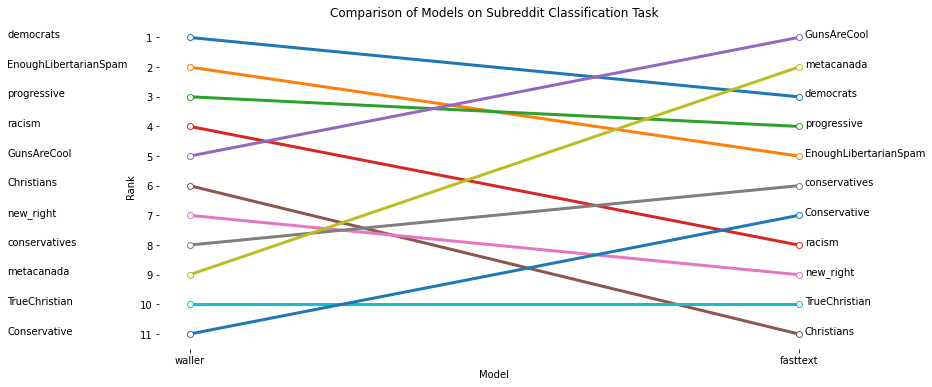

In [10]:
plot_bumpchart(rankings)